In [23]:
import matplotlib.pyplot as plt
import networkx as nx

from data.data_df import key_link

In [16]:
nodes = list(set(key_link['source']) | set(key_link['target']))  # 获取所有节点

In [21]:
g = nx.Graph()
for node in nodes:
    g.add_node(node)
for i, row in key_link.iterrows():
    g.add_edge(row['source'], row['target'], label=row['relation'])

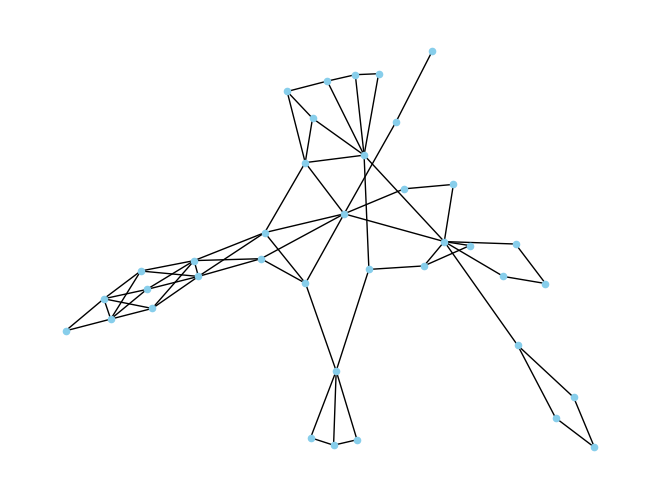

In [28]:
# 绘制图形
nx.draw(g, with_labels=False, node_color='skyblue', node_size=20, font_size=12, font_color='black', font_weight='bold')
plt.show()